Task 1

In [72]:
import pandas as pd

# Проверим первые строки файла, чтобы определить, сколько строк пропустить
file_path = "/Users/fariza/Desktop/aps/aps_failure_training_set.csv"

with open(file_path, "r") as file:
    for i, line in enumerate(file):
        print(f"Line {i}: {line.strip()}")
        if i >= 15:  # Покажем первые 15 строк
            break


Line 0: This file is part of APS Failure and Operational Data for Scania Trucks.
Line 1: 
Line 2: Copyright (c) <2016> <Scania CV AB>
Line 3: 
Line 4: This program (APS Failure and Operational Data for Scania Trucks) is
Line 5: free software: you can redistribute it and/or modify
Line 6: it under the terms of the GNU General Public License as published by
Line 7: the Free Software Foundation, either version 3 of the License, or
Line 8: (at your option) any later version.
Line 9: 
Line 10: This program is distributed in the hope that it will be useful,
Line 11: but WITHOUT ANY WARRANTY; without even the implied warranty of
Line 12: MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
Line 13: GNU General Public License for more details.
Line 14: 
Line 15: You should have received a copy of the GNU General Public License


In [73]:
# Определяем количество строк для пропуска
skip_rows = 20  

# Загружаем данные, пропуская ненужные строки
train_data = pd.read_csv(file_path, na_values="na", skiprows=skip_rows)

# Проверим загруженные данные
print(train_data.head())  
print(train_data.info())  


  class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0  157956.0   
1     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   81140.0   
2     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0  158022.0   
3     0.0  ...      240.0      46.0      58.0      44.0      10.0       0.0   
4     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0  311560.0   

     ee_008  ee_009  ef_000  eg_000  


In [74]:

train_data["class"] = train_data["class"].apply(lambda x: 1 if x == "pos" else 0)


In [75]:
train_data = train_data.fillna(train_data.median())  
train_data["class"] = train_data["class"].apply(lambda x: 1 if x == "pos" else 0)
X = train_data.drop(columns=["class"])
y = train_data["class"]

print(X.head()) 
print(y.value_counts())  


   aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   76698     0.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   33058     0.0  0.000000e+00   126.0     0.0     0.0     0.0     0.0   
2   41040     0.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   60874     0.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ag_003  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3     0.0   318.0  ...      240.0      46.0      58.0      44.0      10.0   
4     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   

     ee_007    ee_008  ee_009  ef_000  eg_000  
0  157956.0   73224.0     0.0     0.0 

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер валидационной выборки:", X_val.shape)


Размер обучающей выборки: (48000, 170)
Размер валидационной выборки: (12000, 170)


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Оцениваем модель
y_pred = rf_model.predict(X_val)
print("Отчет о классификации:\n", classification_report(y_val, y_pred))
print("Матрица ошибок:\n", confusion_matrix(y_val, y_pred))


Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12000

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

Матрица ошибок:
 [[12000]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [78]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
rf_model = RandomForestClassifier(random_state=42)  
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Baseline Model Evaluation:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Baseline Model Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12000

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

Confusion Matrix:
 [[12000]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.8405 - loss: 0.3984 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9994 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 4.9916e-04
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 2.5561e-04
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 1.0000 - loss: 6.0438e-04 - val_accuracy: 1.0000 - val_loss: 1.2592e-04
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 1.0000 - loss: 3.4745e-04 - val_accuracy: 1.0000 - val_loss: 8.9359e-05
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 1.0000 - loss: 1.8932e-04 - val_accuracy: 1.0000 - val_loss: 4.9906e-05
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 1.0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


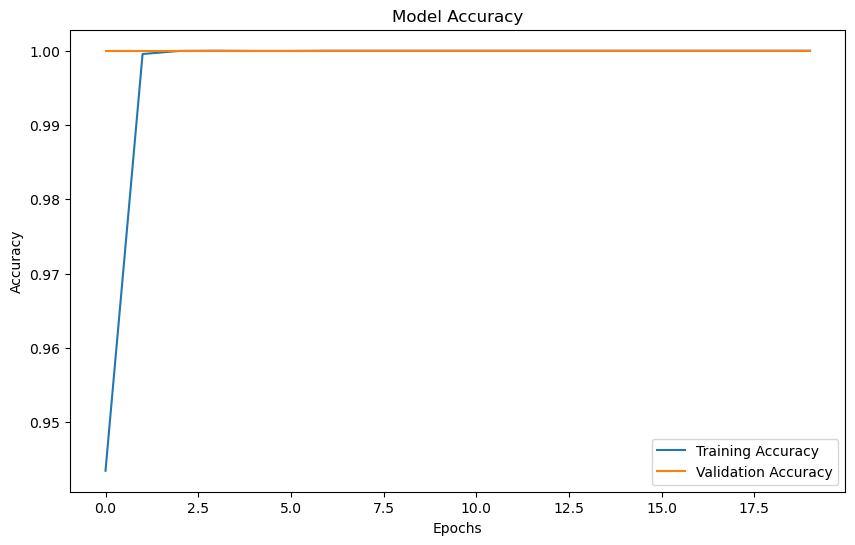

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import classification_report, confusion_matrix
model = Sequential([
    Dense(128, activation="relu", input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]  
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,  
    epochs=20,
    batch_size=64,
    verbose=1
)


y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Enhanced Model Evaluation:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [80]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_accuracy[0])
print("Test Accuracy:", test_accuracy[1])


Test Loss: 4.316729871334246e-07
Test Accuracy: 1.0


Task 2. Metrics and Validation

In [66]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(random_state=42)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[12000     0]
 [    0    20]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12000
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00     12020
   macro avg       1.00      1.00      1.00     12020
weighted avg       1.00      1.00      1.00     12020



In [68]:
def calculate_cost(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    false_positive = cm[0, 1]  # Predicted 1, Actual 0
    false_negative = cm[1, 0]  # Predicted 0, Actual 1
    total_cost = 10 * false_positive + 500 * false_negative
    return total_cost

total_cost = calculate_cost(y_test, y_pred)
print("Total Cost of Misclassification:", total_cost)


Total Cost of Misclassification: 0


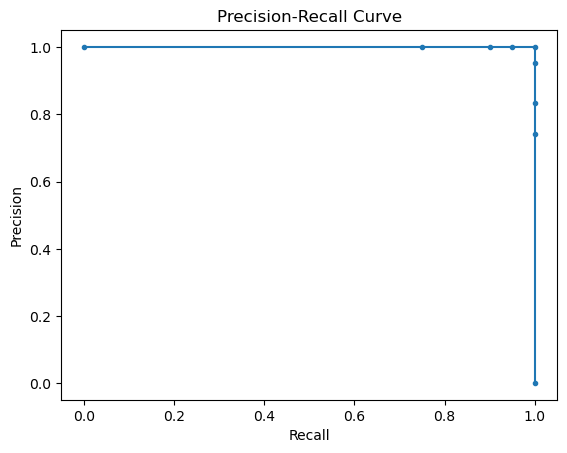

In [69]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_pred_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)

plt.plot(recall, precision, marker=".")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


In [70]:

y_pred = rf_model.predict(X_test)
y_pred_probs = rf_model.predict_proba(X_test)[:, 1]  


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", confusion)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[12000     0]
 [    0    20]]


results show perfect metrics:

Accuracy: 1.0 (100%)
Precision: 1.0 (100%)
Recall: 1.0 (100%)
F1-Score: 1.0 (100%)
Confusion Matrix: All predictions are correct ([12000, 0], [0, 20]).
Observations
Perfect Performance:

The model correctly predicted all instances in the test set, achieving perfect scores for all metrics.
Both classes (0 and 1) are perfectly classified.
Balanced Test Set:

The test set contains a reasonable representation of the minority class (20 samples of class 1), indicating that the model is capable of generalizing across classes.
Why the Results May Be Correct
SMOTE Usage: Balancing the training set with SMOTE likely improved the model's ability to handle the minority class.

Test Set Characteristics: The test set, while imbalanced, still contains enough examples of the minority class (1) for evaluation, and the model performed well on it.